### 逻辑回归

目标：建立分类器，求解出57个参数

设定阈值：根据阈值判断收入是否大于50k

#### 公式推导：

sigmoid函数：

$$g(z)=\frac{1}{1+e^ {-z}} $$

根据线性回归中的预测函数$h_\theta(x)$得到一个预测值

$$h_\theta(x)=\theta_0+\theta_1x_1+\theta_2x_2+...$$

$$h_\theta(x)=\sum_{i=0}^{m}{\theta_ix_i}=\theta^Tx$$

再将$h_\theta(x)$带入sigmoid函数里,就可以完成有预测值到概率的转换，即完成分类任务

新的预测函数$h_\theta(x)$为：

$$h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$


这是一个二分类任务，所以概率可以表示为：

$$ p(y=1|x;\theta) = h_\theta(x)$$

$$p(y=0|x;\theta)=1-h_\theta(x)$$ 

上面两个式子整合在一起，可以得到

$$p(y|x;\theta)=(h_\theta(x))^y(1-h_\theta(x))^{1-y}$$

得到似然函数

$$L(\theta)=\prod_{i=1}^{m}{p(y_i|x;\theta)}=\prod_{i=1}^{m}{(h_\theta(x))^{y_i}(1-h_\theta(x))^{1-y_i}}$$

再对数似然得到：

$$l(\theta)=logL(\theta)=\sum_{i=1}^{m}{(y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)))}$$


根据极大似然估计，要求最大值，相当于梯度上升，但是要用梯度下降来解决问题，所以引入$J(\theta)$

$$J(\theta) = -\frac{1}{m}l(\theta)$$

引入正则化参数，使用L2正则化：

$$J(\theta) = -\frac{1}{m}l(\theta)+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$

即：

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}{(y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)))}+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$

然后在$J(\theta)$中对$\theta$求偏导，结果为：

未引入正则化参数时：

$$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j$$

引入正则化参数$\lambda$后：

$$\frac{\partial J(\theta)}{\partial\theta_j} = (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j)+\frac{\lambda}{m}\theta_j$$

$x_i^j$  :其中i表示第i个样本，j表示该样本的第j个特征


最后就可以进行参数更新了

未引入正则化参数时：

$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j$$

引入正则化参数$\lambda$后：

$$\theta_j=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^{m}((h_\theta(x_i)-y_i)x_i^j+\frac{\lambda}{m}\theta_j)$$

式子中$\alpha$表示学习率或步长

$\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j$表示更新的方向

步长* 方向=更新的值



### 要完成的模块

0.数据切分:分为测试集（3000）和验证集（1000）

1.sigmoid：映射到概率的函数

2.model：返回预测结果

3.cost：根据参数计算损失

4.gradient：计算每个参数的梯度方向

5.descent：进行参数更新

6.accuracy：计算精度

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [13]:
import os
path = 'income.csv'
data = pd.read_csv(path, header = None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,0.0,0.00,1.13,0.0,0.37,0.00,0.00,0.0,0.00,...,0.0,0.145,0.000,0.436,0.000,0.0,1.792,55,147,0
1,2,0.0,0.00,0.60,0.0,0.00,0.60,0.00,0.0,0.60,...,0.0,0.143,0.047,0.191,0.143,0.0,2.041,31,196,1
2,3,0.0,0.00,0.48,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.450,0.000,0.0,1.138,4,41,0
3,4,0.0,0.51,0.00,0.0,0.51,0.51,1.02,0.0,0.00,...,0.0,0.142,0.000,0.071,1.212,0.0,7.025,130,281,1
4,5,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.64,...,0.0,0.116,0.000,0.232,0.000,0.0,1.551,6,45,0


In [14]:
data.shape

(4000, 59)

因为这个数据中ID没啥用，所以为了方便处理，将ID那一列置为1，作为第一个特征，方便确定$\theta_0$

In [15]:
data[[0]] = data[[0]] / data[[0]]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,0.00,1.13,0.0,0.37,0.00,0.00,0.0,0.00,...,0.0,0.145,0.000,0.436,0.000,0.0,1.792,55,147,0
1,1.0,0.0,0.00,0.60,0.0,0.00,0.60,0.00,0.0,0.60,...,0.0,0.143,0.047,0.191,0.143,0.0,2.041,31,196,1
2,1.0,0.0,0.00,0.48,0.0,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.000,0.450,0.000,0.0,1.138,4,41,0
3,1.0,0.0,0.51,0.00,0.0,0.51,0.51,1.02,0.0,0.00,...,0.0,0.142,0.000,0.071,1.212,0.0,7.025,130,281,1
4,1.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.64,...,0.0,0.116,0.000,0.232,0.000,0.0,1.551,6,45,0


Text(0, 0.5, 'Frequency')

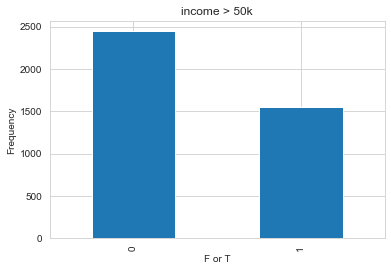

In [16]:
count_classes = pd.value_counts(data[58], sort = True).sort_index()
count_classes.plot(kind = 'bar')# kind = 'bar',表示画条形图
plt.title("income > 50k")
plt.xlabel("F or T")
plt.ylabel("Frequency")

可以发现样本中收入大于60k和小于的差距不是特别悬殊，故暂时不对样本进行均衡处理

均衡处理方案：下采样（同样少）、过采样（同样多）

#### 0.数据切分

利用sklearn中的train_test_split函数

In [17]:
Data = data.values 
cols = Data.shape[1]
X = Data[:,0:cols-1] # 特征
y = Data[:,cols-1:cols]  # class

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  3000
Number transactions test dataset:  1000
Total number of transactions:  4000


In [18]:
X_train[:5]

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 5.880e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.470e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.200e+00, 0.000e+00, 7.300e-01, 0.000e+

In [19]:
y_train[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.]])

将参数$\theta$初始化

In [20]:
theta = np.zeros([1,58])
theta.shape

(1, 58)

#### 1.sigmoid函数实现

$$g(z)=\frac{1}{1+e^ {-z}} $$

In [21]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

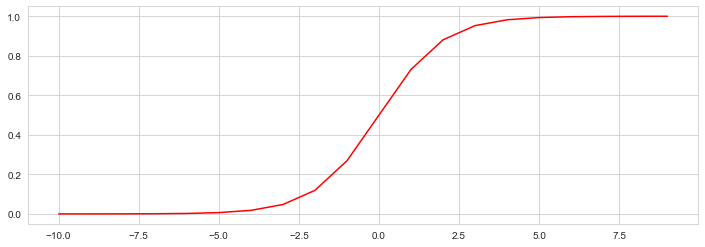

In [22]:
sns.set_style("whitegrid")
nums = np.arange(-10, 10, step = 1)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(nums, sigmoid(nums), 'r')

#### 2.model(预测函数)实现

$$ h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$$

In [23]:
def model(X, theta):
    return sigmoid(np.dot(X,theta.T))

#### 3.损失函数

将对数似然函数去掉负号

$$Cost(h_\theta(x),y) = -y\log(h_\theta(x))-(1-y)\log(1-h_\theta(x))$$

另外引入正则化参数后，损失函数变为，使用L2正则化：

求平均损失：

$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}{Cost(h_\theta(x_i),y_i)}$$

另外引入正则化参数后，损失函数变为，使用L2正则化：

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}{(y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)))}+\frac{\lambda}{2m}\sum_{j=1}^{n}{\theta_{j}^2}$$



$$model(X,theta) = h_\theta(x)$$

In [58]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)+0.000000001))
    right = np.multiply(1-y, np.log(1-model(X, theta)+0.000000001))
    return (np.sum(left - right) / len(X))

In [59]:
cost(X_train,y_train,theta)

0.6931471785599455

#### 4.计算梯度

$$\frac{\partial J}{\partial\theta_j} = -\frac{1}{m}\sum_{i=1}^{m}(y_i-
h_\theta(x_i))x_i^j$$

引入正则化后：

$$\frac{\partial J(\theta)}{\partial\theta_j} = (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x_i)-y_i)x_i^j)+\frac{\lambda}{m}\theta_j$$

In [60]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
        
    return grad

#### 几种停止策略

In [73]:
STOP_ITER = 0 # 以迭代次数为准
STOP_COST = 1 # 以损失值为准
STOP_GRAD = 2 # 以梯度为准
# 上面是三种梯度下降停止策略
def stopCriterion(type, value, threshold):
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

#### 梯度下降求解

In [74]:
import time
# 梯度下降求解
def descent(X, y, theta, batchSize, stopType, thresh, alpha):
    init_time = time.time()
    i = 0  # 迭代次数
    k = 0  # batch
    grad = np.zeros(theta.shape)  # 计算的梯度
    costs = [cost(X, y, theta)]  # 损失值
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize  # 取batchSize个数据
        if k >= n:      # n是训练样本个数
            k = 0
        theta = theta - alpha*grad  # 参数更新
        costs.append(cost(X, y, theta))  # 计算新的损失
        i += 1
        
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh):
            break
        
    return theta, i-1, costs, grad, time.time() - init_time

In [75]:
def runExpe(X, y, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(X, y, theta, batchSize, stopType, thresh, alpha)  
    print("theta:{}".format(theta))
    print("duration:{:03.2f}s".format(dur))
    fig, ax = plt.subplots(figsize=(12,4))
    # print(costs)
    # print(len(costs))
    # print(type(costs))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    #ax.set_title(name.upper() + ' - Error vs. Iteration')
    ax.set_title('loss')
    return theta

### 不同停止策略对结果的影响

#### 1.设定迭代次数

#### 2.设定阈值

直到损失函数减小的值小于thresh时，停止迭代

#### 3.根据梯度变化

设定阈值thresh，当梯度变化小于这个值的时候停止迭代

### 对比不同的梯度下降方法

#### 1.随机梯度下降

#### 2.Mini-batch

In [76]:
n = 3000

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


theta:[[-1.26435748e+00 -4.80123528e-02 -4.52198694e-01 -1.87689570e-01
   8.02068324e-02 -2.39889048e-02  1.57848467e-02  1.09077040e-01
   3.14888752e-02  3.51702341e-02 -1.10783629e-01  1.06154370e-02
  -7.23519802e-01 -3.39846480e-02 -2.62369336e-02  4.08955860e-02
   1.57473452e-01  5.50324388e-02 -6.16943784e-03 -1.03677474e+00
   1.37612039e-01 -1.60565563e-01  1.19607082e-01  1.27117551e-01
   1.07714749e-01 -1.48800678e+00 -7.11623792e-01 -9.76949286e-01
  -3.40220535e-01 -2.64833497e-01 -2.67527675e-01 -1.84043870e-01
  -1.09340668e-01 -3.05792240e-01 -1.08547335e-01 -3.16112633e-01
  -2.17168762e-01 -3.48698665e-01 -2.72653546e-02 -2.81601483e-01
  -1.13853119e-01 -1.56854809e-01 -3.95424474e-01 -1.29640454e-01
  -2.01556341e-01 -6.57202275e-01 -5.26881826e-01 -1.04064862e-02
  -1.04542289e-01 -6.89214545e-02 -2.41431977e-01 -3.49890097e-02
   3.98734526e-02  6.80621591e-02  1.58135282e-03 -2.00033562e+00
   2.02351591e+00 -5.01160616e-01]]
duration:0.40s


array([[-1.26435748e+00, -4.80123528e-02, -4.52198694e-01,
        -1.87689570e-01,  8.02068324e-02, -2.39889048e-02,
         1.57848467e-02,  1.09077040e-01,  3.14888752e-02,
         3.51702341e-02, -1.10783629e-01,  1.06154370e-02,
        -7.23519802e-01, -3.39846480e-02, -2.62369336e-02,
         4.08955860e-02,  1.57473452e-01,  5.50324388e-02,
        -6.16943784e-03, -1.03677474e+00,  1.37612039e-01,
        -1.60565563e-01,  1.19607082e-01,  1.27117551e-01,
         1.07714749e-01, -1.48800678e+00, -7.11623792e-01,
        -9.76949286e-01, -3.40220535e-01, -2.64833497e-01,
        -2.67527675e-01, -1.84043870e-01, -1.09340668e-01,
        -3.05792240e-01, -1.08547335e-01, -3.16112633e-01,
        -2.17168762e-01, -3.48698665e-01, -2.72653546e-02,
        -2.81601483e-01, -1.13853119e-01, -1.56854809e-01,
        -3.95424474e-01, -1.29640454e-01, -2.01556341e-01,
        -6.57202275e-01, -5.26881826e-01, -1.04064862e-02,
        -1.04542289e-01, -6.89214545e-02, -2.41431977e-0

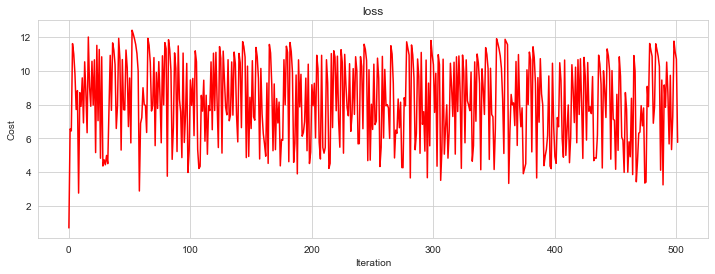

In [78]:
runExpe(X_train, y_train, theta, 30, STOP_ITER, thresh=500, alpha=0.01)

### 精度预测

In [83]:
def predict(X, theta):
    # 阈值设定为0.5，概率大于0.5预测值为1，小于0.5则为0
    return [1 if x>= 0.5 else 0 for x in model(X, theta)]

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

theta:[[-8.22022940e-04 -1.27616607e-06 -3.06666449e-04 -3.58282621e-05
   1.14391668e-04  1.13502281e-04  6.10144282e-05  2.00338780e-04
   9.62278262e-05  5.08753935e-05 -2.14376463e-06  3.98046751e-05
  -4.45766702e-04  5.19117318e-06 -1.28692132e-05  5.08154213e-05
   3.13245851e-04  1.47440871e-04  8.09135045e-05 -2.29571290e-04
   1.47333902e-04  3.17073792e-04  1.34635995e-04  1.72654991e-04
   1.48396645e-04 -1.34313707e-03 -6.34774384e-04 -2.11400158e-03
  -2.72730587e-04 -2.27085453e-04 -2.28562823e-04 -1.50654771e-04
  -9.79213566e-05 -2.38054595e-04 -9.69088626e-05 -2.44770539e-04
  -1.78503499e-04 -2.81407277e-04 -2.27347207e-05 -2.00758850e-04
  -8.53779429e-05 -1.17687697e-04 -3.53717115e-04 -1.07039728e-04
  -1.85778759e-04 -5.53387583e-04 -4.41812960e-04 -9.59545083e-06
  -7.46012034e-05 -5.51438336e-05 -1.71327126e-04 -2.83057633e-05
   1.99427991e-04  1.06695072e-04  3.02097189e-05 -7.52989248e-04
   7.04902829e-03 -1.08765376e-04]]
duration:34.91s


0.436

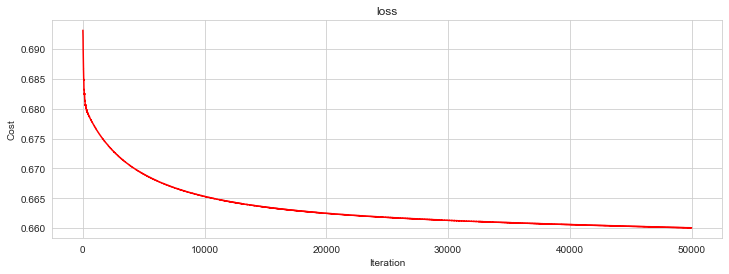

In [85]:
theta0 = runExpe(X_train, y_train, theta, 30, STOP_ITER, thresh=50000, alpha=0.0000001)
y_pred = predict(X_test, theta0)
accuracy_score(y_test, y_pred)

### 实验优化

### 用数据预处理之后再次进行实验

#### 数据预处理

利用sklearn的一个函数preprocessing对数据进行预处理，使得生成的数据都在一定范围内波动，可以与没有进行预处理的数据最终的结果进行对比

In [94]:
from sklearn import preprocessing as pp

dealed_data = data.copy()
dealed_data = pp.scale(data, axis=0)
dealed_data[:5]

array([[ 0.00000000e+00, -3.45874447e-01, -1.65937209e-01,
         1.68280718e+00, -4.52716534e-02,  8.56244351e-02,
        -3.56975977e-01, -2.82491805e-01, -2.59359944e-01,
        -3.34025945e-01, -3.64195110e-01, -2.92460262e-01,
        -6.22593873e-01, -3.10915158e-01, -1.74908288e-01,
        -1.89925674e-01,  1.82477383e-01, -3.24729292e-01,
         3.53615478e-01, -2.90015771e-01, -1.67465564e-01,
        -3.61366212e-01, -1.17483863e-01, -2.87188505e-01,
        -2.07073366e-01, -3.26222481e-01, -3.00701625e-01,
        -2.31931689e-01, -2.26672371e-01, -1.57422194e-01,
        -2.24434963e-01, -1.54687899e-01, -1.43011509e-01,
        -1.71756713e-01, -1.45370909e-01, -1.88663070e-01,
        -2.46906277e-01, -3.22841360e-01, -6.25240738e-02,
        -1.80429365e-01, -1.93758795e-01, -1.23533713e-01,
        -1.74158913e-01, -2.06057510e-01, -1.26933178e-01,
        -3.03661932e-01, -2.01432997e-01, -6.92997491e-02,
        -1.18648948e-01, -1.59700804e-01,  3.36701605e-0

标准化后数据格式变成了ndarray，不方便观察标准化后结果，给变回来变成dataframe

In [95]:
dealed_data = pd.DataFrame(dealed_data)
dealed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,-0.345874,-0.165937,1.682807,-0.045272,0.085624,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,0.033670,-0.176108,0.201020,-0.302462,-0.102646,-0.103960,0.013458,-0.238062,-0.797072
1,0.0,-0.345874,-0.165937,0.636491,-0.045272,-0.456581,1.942201,-0.282492,-0.25936,1.914865,...,-0.159701,0.026219,0.327348,-0.090481,0.268144,-0.102646,-0.096448,-0.104431,-0.150551,1.254593
2,0.0,-0.345874,-0.165937,0.399589,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,-0.506573,-0.176108,0.217677,-0.302462,-0.102646,-0.123691,-0.237055,-0.427374,-0.797072
3,0.0,-0.345874,0.204054,-0.548018,-0.045272,0.290783,1.597325,2.360100,-0.25936,-0.334026,...,-0.159701,0.022493,-0.176108,-0.233257,4.533722,-0.102646,0.053915,0.381859,0.001256,1.254593
4,0.0,-0.345874,-0.165937,-0.548018,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,2.064791,...,-0.159701,-0.074378,-0.176108,-0.041699,-0.302462,-0.102646,-0.111231,-0.227231,-0.420230,-0.797072


因为前面用sklearn的一个函数对数据进行标准化的时候把class的值也改变了，所以这里给改回来

In [96]:
dealed_data[58][dealed_data[58]<0]=0
dealed_data[58][dealed_data[58]>0]=1
dealed_data[0] = 1
dealed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,-0.345874,-0.165937,1.682807,-0.045272,0.085624,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,0.033670,-0.176108,0.201020,-0.302462,-0.102646,-0.103960,0.013458,-0.238062,0.0
1,1,-0.345874,-0.165937,0.636491,-0.045272,-0.456581,1.942201,-0.282492,-0.25936,1.914865,...,-0.159701,0.026219,0.327348,-0.090481,0.268144,-0.102646,-0.096448,-0.104431,-0.150551,1.0
2,1,-0.345874,-0.165937,0.399589,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,-0.334026,...,-0.159701,-0.506573,-0.176108,0.217677,-0.302462,-0.102646,-0.123691,-0.237055,-0.427374,0.0
3,1,-0.345874,0.204054,-0.548018,-0.045272,0.290783,1.597325,2.360100,-0.25936,-0.334026,...,-0.159701,0.022493,-0.176108,-0.233257,4.533722,-0.102646,0.053915,0.381859,0.001256,1.0
4,1,-0.345874,-0.165937,-0.548018,-0.045272,-0.456581,-0.356976,-0.282492,-0.25936,2.064791,...,-0.159701,-0.074378,-0.176108,-0.041699,-0.302462,-0.102646,-0.111231,-0.227231,-0.420230,0.0


In [97]:
# 预处理过的数据

dealed_Data = dealed_data.values 
cols2 = dealed_Data.shape[1]
dealed_X = dealed_Data[:,0:cols2-1]
dealed_y = dealed_Data[:,cols2-1:cols2]

from sklearn.model_selection import train_test_split

dealed_X_train, dealed_X_test, dealed_y_train, dealed_y_test = train_test_split(dealed_X, dealed_y, test_size = 0.25, random_state = 0)

print("Number transactions train dataset: ", len(dealed_X_train))
print("Number transactions test dataset: ", len(dealed_X_test))
print("Total number of transactions: ", len(dealed_X_train)+len(dealed_X_test))

Number transactions train dataset:  3000
Number transactions test dataset:  1000
Total number of transactions:  4000


In [98]:
dealed_X_train[:5]

array([[ 1.        , -0.34587445, -0.16593721, -0.548018  , -0.04527165,
        -0.45658061, -0.35697598, -0.28249181, 14.0464628 , -0.33402594,
        -0.36419511, -0.29246026, -0.62259387, -0.31091516, -0.17490829,
        -0.18992567, -0.3304013 , -0.32472929, -0.34232062, -0.92407107,
        -0.16746556, -0.67008538, -0.11748386, -0.2871885 , -0.20707337,
        -0.32622248, -0.30070163, -0.23193169, -0.22667237, -0.15742219,
        -0.22443496, -0.1546879 , -0.14301151, -0.17175671, -0.14537091,
        -0.18866307, -0.24690628, -0.32284136, -0.06252407, -0.18042937,
        -0.1937588 , -0.12353371, -0.17415891, -0.20605751, -0.12693318,
        -0.30366193, -0.201433  , -0.06929975, -0.11864895, -0.1597008 ,
        -0.50657254, -0.17610761, -0.31773295, -0.30246202, -0.10264556,
        -0.12785424, -0.25179133, -0.48273808],
       [ 1.        , -0.34587445, -0.16593721, -0.548018  , -0.04527165,
        -0.45658061, -0.35697598, -0.28249181, -0.25935994, -0.33402594,
   

In [100]:
cost(dealed_X_train, dealed_y_train, theta)

0.6931471785599455

theta:[[-0.33303637  0.0229669  -0.04663419  0.10875702  0.07669644  0.22480632
   0.18614207  0.36476913  0.17818234  0.1824935   0.12055672  0.09131867
  -0.05593854  0.07459261  0.02944084  0.14596837  0.31545252  0.23709583
   0.1678288   0.15136086  0.17916836  0.24277641  0.13674834  0.31925692
   0.20146225 -0.19017242 -0.15313339 -0.16702259 -0.06460608 -0.07880157
  -0.10726371 -0.06235586 -0.03410523 -0.11009342 -0.02828827 -0.08275331
  -0.03723573 -0.10041676 -0.03290085 -0.09221401  0.00107909 -0.07391487
  -0.13357939 -0.08035714 -0.07874325 -0.14673588 -0.15158561 -0.04123256
  -0.08763477 -0.05072151 -0.05788162 -0.05135447  0.21115829  0.3077746
   0.0737888   0.07983988  0.17405114  0.22996664]]
duration:0.37s


0.906

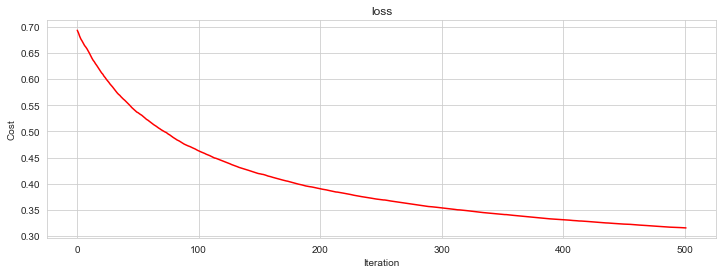

In [102]:
theta1 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=500, alpha=0.01)
y_pred = predict(dealed_X_test, theta1)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.05  0.02 -0.01  0.04  0.01  0.05  0.05  0.07  0.04  0.05  0.03  0.04
  -0.    0.02  0.01  0.04  0.06  0.06  0.04  0.05  0.04  0.07  0.02  0.07
   0.04 -0.05 -0.04 -0.04 -0.03 -0.02 -0.03 -0.02 -0.02 -0.02 -0.02 -0.02
  -0.02 -0.03 -0.   -0.02 -0.   -0.02 -0.03 -0.02 -0.02 -0.03 -0.03 -0.01
  -0.02 -0.01 -0.02 -0.01  0.05  0.06  0.01  0.02  0.04  0.06]]
duration:0.37s


0.9

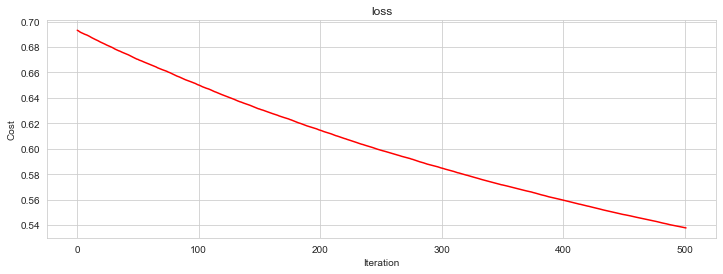

In [114]:
theta6 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=500, alpha=0.001)
y_pred = predict(dealed_X_test, theta6)
accuracy_score(dealed_y_test, y_pred)

theta:[[-4.0632217  -0.02980693 -0.28640108 -0.01566915  1.37829232  0.50533291
   0.16060784  1.38818207  0.07077264  0.07333489  0.27971549 -0.08379025
  -0.11804232  0.13471451 -0.02232556  0.19279112  0.6505452   0.64905291
   0.06336074 -0.07347365  0.66840491  0.11408647  0.39695476  1.30283063
   0.08292475 -2.77373501 -1.0918646  -7.1300881   0.29133478 -1.69841182
  -0.26634768 -2.27823801 -0.51658993 -0.46374824  0.18479953 -1.09100493
   0.43211618  0.02672441  0.22057959 -0.51489962 -0.16925841 -3.01658975
  -2.63928642 -0.19408043 -0.8616261  -0.67132715 -1.36463243 -0.06528451
  -1.27588142 -0.31141582 -0.25170719 -0.23057429  0.56497316  1.36851529
   1.11726483 -0.31874753  1.28917462  0.55554539]]
duration:3.57s


0.914

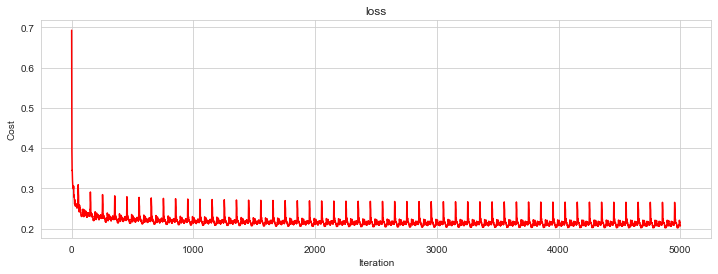

In [104]:
theta9 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=1)
y_pred = predict(dealed_X_test, theta9)
accuracy_score(dealed_y_test, y_pred)

theta:[[-1.67820489 -0.05054686 -0.25532497  0.08445163  0.45883258  0.37357043
   0.19212949  1.3266771   0.19556862  0.21613409  0.16078124 -0.0791195
  -0.1254448   0.01266845  0.00428381  0.25427446  0.71038596  0.47852556
   0.11328783  0.07602387  0.46729302  0.21386217  0.52566948  1.32420572
   0.3340999  -1.99606792 -1.01723284 -1.82323598  0.2538135  -0.71310695
  -0.29829274 -0.64457625 -0.22586398 -0.48168775  0.07110654 -0.8058104
   0.30936539  0.1188919   0.0789718  -0.48059403 -0.12332807 -0.76344536
  -1.26273685 -0.13235694 -0.67066179 -0.67842671 -1.09810293 -0.0853582
  -0.73626869 -0.35703426 -0.23328025 -0.36466181  0.24508647  1.36239072
   0.47024674 -0.20580585  0.87693484  0.40422113]]
duration:3.62s


0.913

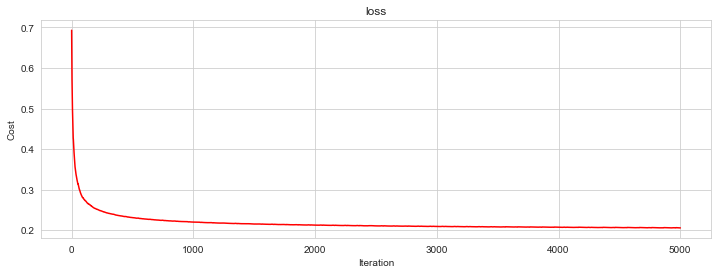

In [105]:
theta10 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.1)
y_pred = predict(dealed_X_test, theta10)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.69765699 -0.0503803  -0.15714023  0.09794118  0.21635198  0.35786749
   0.21584014  0.97233323  0.24992015  0.23812981  0.16250016 -0.01981153
  -0.13805458  0.02782453  0.02119837  0.25757838  0.68614871  0.4118509
   0.18323262  0.11072345  0.36593206  0.25815715  0.35127801  0.83553845
   0.44062028 -0.71166431 -0.46488803 -0.51931456  0.0658495  -0.26500047
  -0.28448119 -0.20098068 -0.08259137 -0.33083125 -0.04394192 -0.25892776
   0.09649183 -0.05252946 -0.04816666 -0.24807485 -0.08115831 -0.23937973
  -0.45122486 -0.14052248 -0.26862052 -0.42950199 -0.49934406 -0.09742476
  -0.28678921 -0.21842804 -0.14513408 -0.18120804  0.36432225  0.85772802
   0.19531431  0.12467619  0.40311146  0.38928704]]
duration:3.42s


0.912

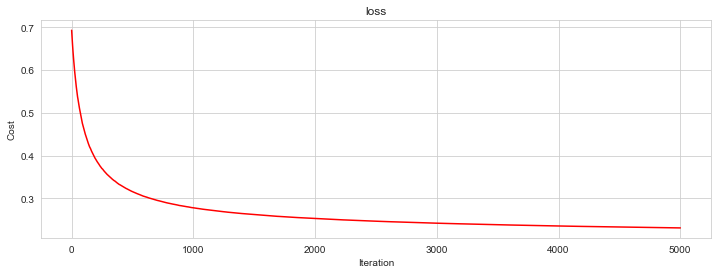

In [106]:
theta11 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.01)
y_pred = predict(dealed_X_test, theta11)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.33169596  0.02358669 -0.04492385  0.10830812  0.07693783  0.22328937
   0.18815518  0.36442408  0.17755379  0.18344299  0.12012449  0.09215546
  -0.05500018  0.07314446  0.03029105  0.14547403  0.31564953  0.23603785
   0.1665225   0.15249354  0.17879719  0.24456279  0.13697543  0.31770791
   0.20134415 -0.18979517 -0.15043104 -0.16543644 -0.06282452 -0.07713969
  -0.10548333 -0.06322367 -0.03372916 -0.10802443 -0.02809431 -0.08227351
  -0.03691571 -0.09884579 -0.03256864 -0.09257717  0.00170708 -0.07264563
  -0.13095867 -0.08066111 -0.07949071 -0.1466468  -0.15030603 -0.04129114
  -0.08878453 -0.05063276 -0.05957211 -0.04931382  0.21219087  0.3049124
   0.07286854  0.08264566  0.17291428  0.23061794]]
duration:3.40s


0.904

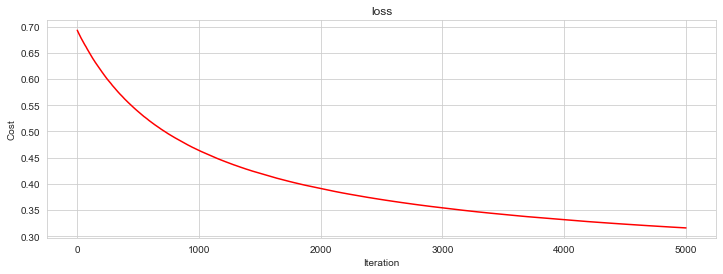

In [107]:
theta6 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.001)
y_pred = predict(dealed_X_test, theta6)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.05361771  0.02320341 -0.00817259  0.03550251  0.01427499  0.04930249
   0.04869686  0.06996577  0.03976601  0.04977622  0.02995936  0.03975751
  -0.00207769  0.02478261  0.01263267  0.03795377  0.06377802  0.05586792
   0.04062437  0.05151587  0.04198924  0.07167138  0.02320865  0.06719331
   0.04383187 -0.0453533  -0.04068729 -0.03811732 -0.02634765 -0.02153231
  -0.02880938 -0.02053351 -0.01596558 -0.02394016 -0.01512998 -0.02416809
  -0.0212229  -0.03157959 -0.00497889 -0.02444877 -0.00432444 -0.01814559
  -0.02785537 -0.02431032 -0.01716671 -0.0300754  -0.03014291 -0.00796969
  -0.01907874 -0.00818744 -0.01635509 -0.01314758  0.0452441   0.06319956
   0.01468984  0.02194534  0.04115329  0.05500348]]
duration:3.46s


0.9

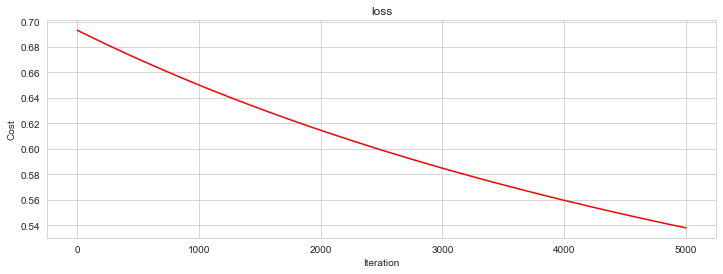

In [108]:
theta12 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.0001)
y_pred = predict(dealed_X_test, theta12)
accuracy_score(dealed_y_test, y_pred)

theta:[[-5.63734933e-03  3.19868629e-03 -8.89596709e-04  4.41226210e-03
   1.60378074e-03  5.73163649e-03  5.86279135e-03  8.04371401e-03
   4.72317141e-03  6.19703176e-03  3.63198861e-03  5.09258697e-03
   2.82264958e-05  3.09459825e-03  1.64780923e-03  4.73034562e-03
   7.39918723e-03  6.75848784e-03  4.86777857e-03  6.40714104e-03
   5.05889271e-03  8.75041964e-03  2.54855038e-03  7.98891913e-03
   5.24489711e-03 -5.71648270e-03 -5.25829562e-03 -4.52669265e-03
  -3.68770432e-03 -2.92599143e-03 -3.90792974e-03 -2.99714585e-03
  -2.58365501e-03 -2.84343860e-03 -2.48865380e-03 -3.32502327e-03
  -3.18801991e-03 -3.98972400e-03 -5.29477700e-04 -3.06929784e-03
  -1.09938760e-03 -2.20769667e-03 -3.30713031e-03 -3.08397721e-03
  -2.02534060e-03 -3.51312724e-03 -3.47499825e-03 -8.94896549e-04
  -2.24227776e-03 -9.17871787e-04 -2.04519393e-03 -1.65370083e-03
   5.32744071e-03  7.55377442e-03  1.69007926e-03  2.79340480e-03
   5.15083074e-03  6.69494956e-03]]
duration:3.47s


0.899

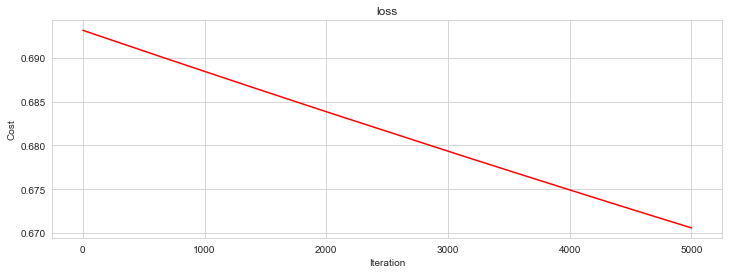

In [109]:
theta14 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.00001)
y_pred = predict(dealed_X_test, theta14)
accuracy_score(dealed_y_test, y_pred)

theta:[[-0.7  -0.05 -0.16  0.1   0.22  0.36  0.22  0.97  0.25  0.24  0.16 -0.02
  -0.14  0.03  0.02  0.26  0.69  0.41  0.18  0.11  0.37  0.26  0.35  0.84
   0.44 -0.71 -0.46 -0.52  0.07 -0.27 -0.28 -0.2  -0.08 -0.33 -0.04 -0.26
   0.1  -0.05 -0.05 -0.25 -0.08 -0.24 -0.45 -0.14 -0.27 -0.43 -0.5  -0.1
  -0.29 -0.22 -0.15 -0.18  0.36  0.86  0.2   0.12  0.4   0.39]]
duration:3.40s


0.912

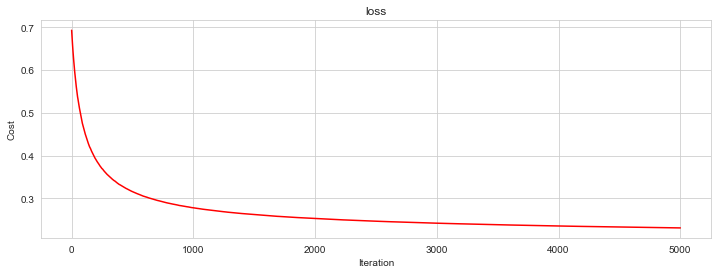

In [115]:
theta2 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.01)
y_pred = predict(dealed_X_test, theta2)
accuracy_score(dealed_y_test, y_pred)

theta:[[-1.67 -0.05 -0.25  0.08  0.46  0.36  0.2   1.32  0.19  0.24  0.15 -0.08
  -0.13  0.    0.01  0.26  0.72  0.46  0.11  0.08  0.46  0.24  0.52  1.32
   0.35 -2.   -1.01 -1.8   0.26 -0.71 -0.3  -0.65 -0.22 -0.48  0.05 -0.81
   0.3   0.14  0.07 -0.48 -0.12 -0.75 -1.26 -0.13 -0.68 -0.68 -1.09 -0.08
  -0.74 -0.36 -0.24 -0.37  0.26  1.36  0.46 -0.2   0.86  0.4 ]]
duration:34.66s


0.915

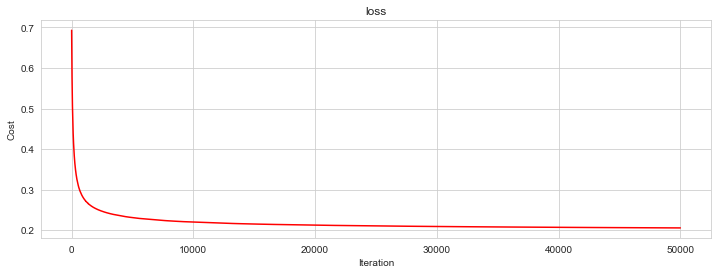

In [116]:
theta8 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=50000, alpha=0.01)
y_pred = predict(dealed_X_test, theta8)
accuracy_score(dealed_y_test, y_pred)

theta:[[-1.66 -0.05 -0.25  0.07  0.47  0.37  0.22  1.31  0.18  0.23  0.16 -0.08
  -0.14  0.01  0.02  0.25  0.71  0.45  0.1   0.09  0.46  0.23  0.52  1.32
   0.34 -1.99 -1.02 -1.82  0.26 -0.71 -0.28 -0.65 -0.23 -0.48  0.07 -0.81
   0.29  0.14  0.07 -0.48 -0.12 -0.76 -1.27 -0.13 -0.67 -0.67 -1.08 -0.08
  -0.74 -0.37 -0.23 -0.36  0.3   1.37  0.47 -0.2   0.88  0.39]]
duration:3.51s


0.915

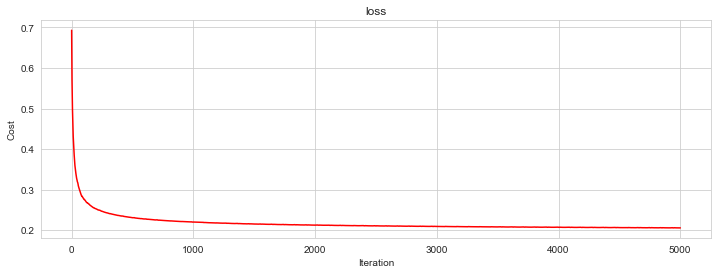

In [427]:
theta3 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=5000, alpha=0.1)
y_pred = predict(dealed_X_test, theta3)
accuracy_score(dealed_y_test, y_pred)

theta:[[-2.22712222 -0.06041374 -0.2635789   0.08007616  0.6049027   0.37184825
   0.20035821  1.28949618  0.18836223  0.2200479   0.15710591 -0.08637339
  -0.1215865   0.01575812  0.0094326   0.24272845  0.70240267  0.48997242
   0.10091987  0.07109444  0.47813358  0.22191555  0.4852512   1.28002617
   0.30880959 -2.38716511 -1.07588265 -2.74258051  0.2815711  -0.92580704
  -0.26113378 -0.93096355 -0.3420345  -0.45840956  0.13170514 -1.01718275
   0.34094823  0.13355054  0.09214662 -0.52202403 -0.12412471 -1.13074466
  -1.60752967 -0.13375989 -0.7812093  -0.68647088 -1.20458588 -0.07296127
  -0.92124526 -0.35280074 -0.22963816 -0.3545036   0.23006476  1.37839693
   0.61690236 -0.31194812  1.12081887  0.41030432]]
duration:7.20s


0.915

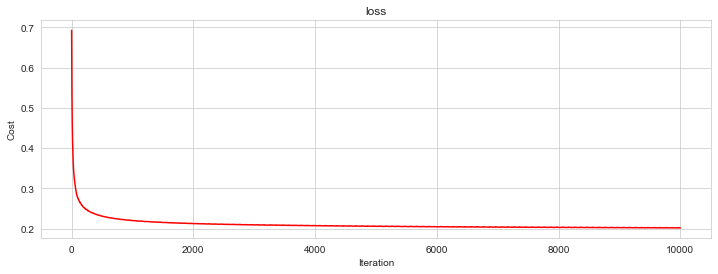

In [110]:
theta4 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=10000, alpha=0.1)
y_pred = predict(dealed_X_test, theta4)
accuracy_score(dealed_y_test, y_pred)

theta:[[-3.87709466 -0.0792167  -0.26834818  0.0736311   1.30570009  0.36871712
   0.23742199  1.24165436  0.17680998  0.22887167  0.1535752  -0.09131547
  -0.11959319  0.01626896  0.02733264  0.27935535  0.69497734  0.49791664
   0.08948817  0.06229646  0.56061938  0.24025258  0.37272545  1.12599838
   0.27690455 -2.80239333 -1.10336186 -6.47281427  0.30293405 -1.59295087
  -0.23876959 -2.07087561 -0.73816133 -0.42545578  0.24774307 -1.11982778
   0.3723377   0.14113969  0.09138248 -0.56776278 -0.12910255 -2.9010885
  -2.61744926 -0.13457746 -0.86597951 -0.66519782 -1.25596002 -0.04833186
  -1.23288728 -0.33420895 -0.21890209 -0.2889787   0.20645378  1.34902554
   0.97020508 -0.39233816  1.31364869  0.47576998]]
duration:34.92s


0.922

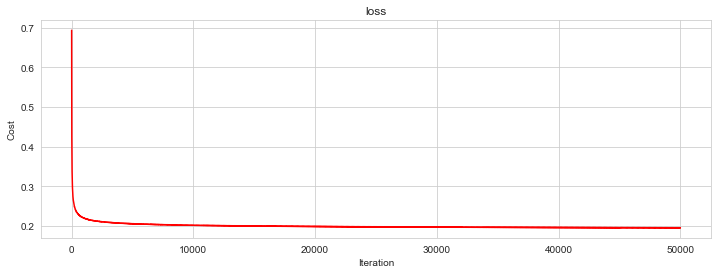

In [111]:
theta5 = runExpe(dealed_X_train, dealed_y_train, theta, 30, STOP_ITER, thresh=50000, alpha=0.1)
y_pred = predict(dealed_X_test, theta5)
accuracy_score(dealed_y_test, y_pred)

#### 混淆矩阵

In [112]:
def plot_confusion_matrix(cm, classes, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # this fuction is used tp print the confusion matrix
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment='center', 
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predict label')

recall metric in the test data:  0.868020304568528
accuracy in the test data:  0.922


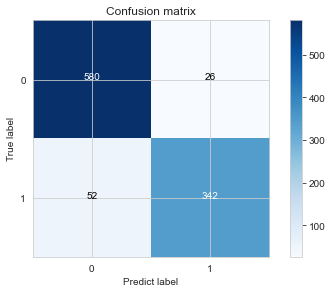

In [113]:
import itertools
from sklearn.metrics import confusion_matrix

y_pred = predict(dealed_X_test, theta5)

cnf_matrix = confusion_matrix(dealed_y_test, y_pred)
np.set_printoptions(precision = 2)

print("recall metric in the test data: ", cnf_matrix[1, 1]/(cnf_matrix[1, 0] + cnf_matrix[1, 1]))
print("accuracy in the test data: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[1,1]+cnf_matrix[1,0]+cnf_matrix[0,1]+cnf_matrix[0,0]))
# plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix,
                     classes=class_names,
                     title = 'Confusion matrix')
plt.show()